<a href="https://colab.research.google.com/github/shengchishih/Machine-Learning-and-Deep-Learning/blob/main/Model_Evaluation_and_Refinement-car_date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df=pd.read_csv(filepath)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#get only numerical data

df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
#Now, we define the functions that will be used in the lab for making plots at different stages.
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

In [ ]:
y_data = df['price']
x_data=df.drop('price',axis=1)

#split data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [ ]:
x_train1,x_test1, y_train1, y_test1 =train_test_split(x_data,y_data, test_size=0.4, random_state=0)

In [ ]:
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [ ]:
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [ ]:
# compute the R^2

lre.score(x_test[['horsepower']],y_test)

0.36358755750788263

In [ ]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [ ]:
lre1=LinearRegression()
lre1.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [ ]:
lre1.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

#Cross-Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [ ]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [ ]:
Rcross1=cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1.mean()

0.5166761697127429

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
#You can also use the function 'cross_val_predict' to predict the output.
#The function splits up the data into the specified number of folds,
#with one fold for testing and the other folds are used for training. First, import the function:

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#Part 2: Overfitting, Underfitting and Model Selection

In [ ]:
lr = LinearRegression()
param=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

lr.fit(x_train[param], y_train)

LinearRegression()

In [ ]:
yhat_train = lr.predict(x_train[param])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

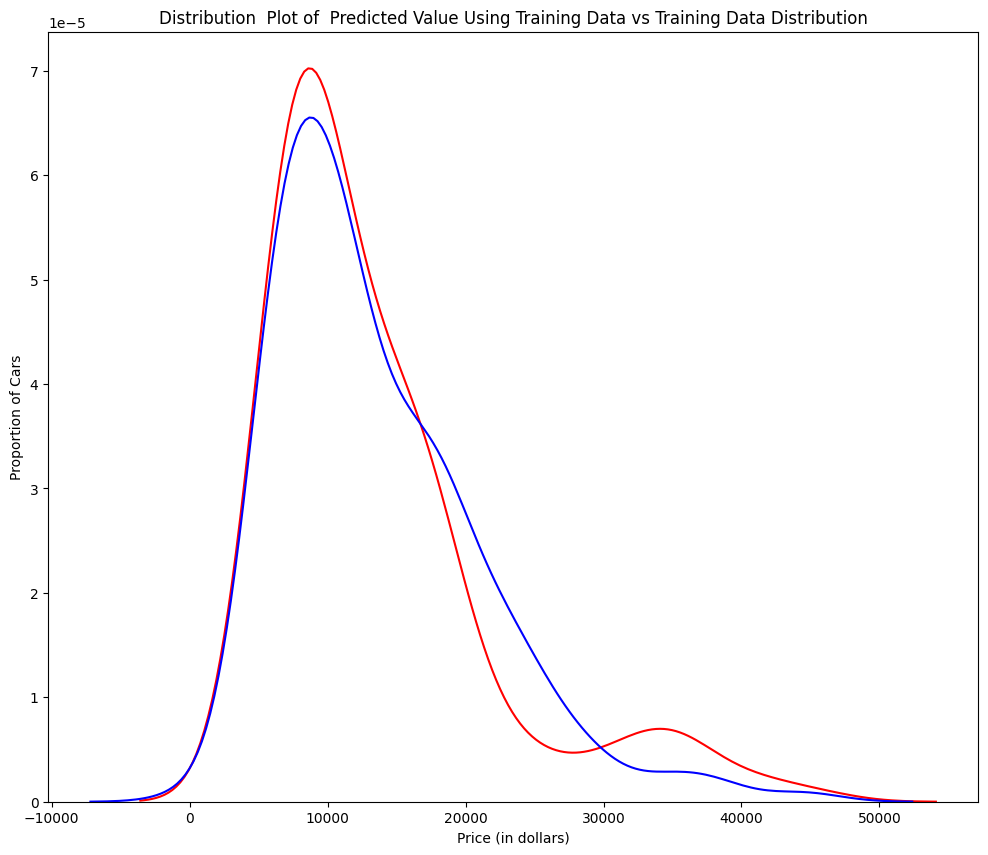

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

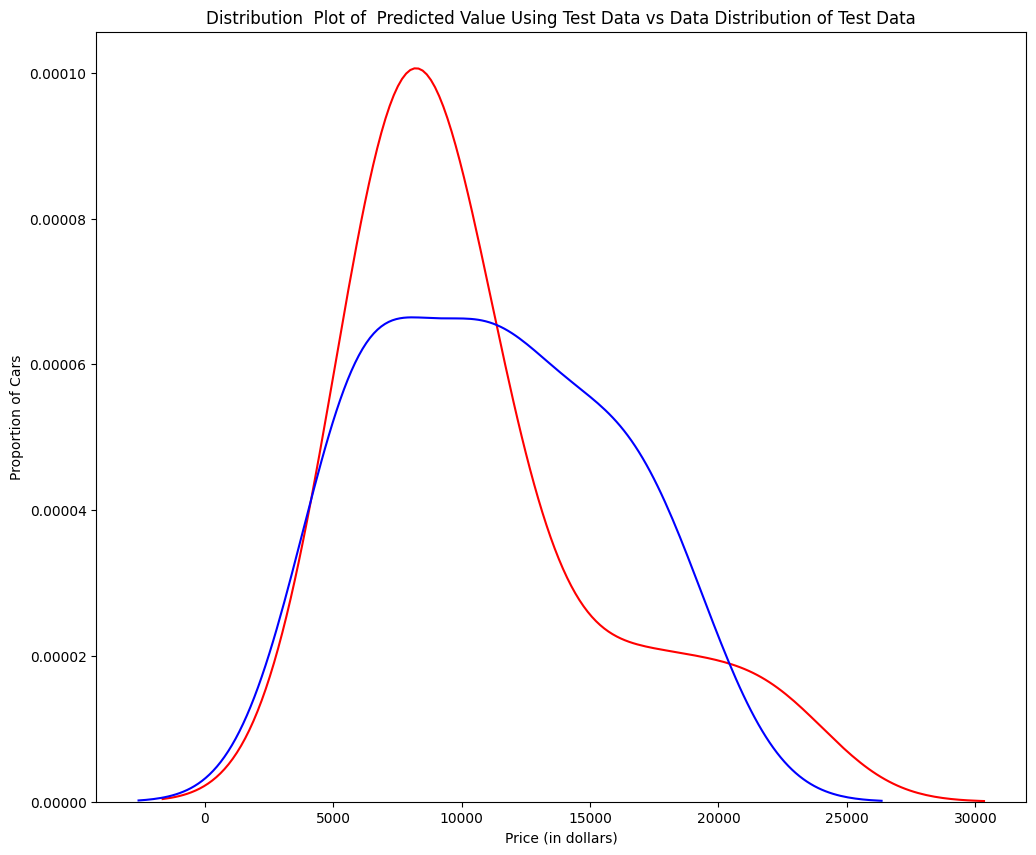

In [ ]:
yhat_test=lr.predict(x_test[param])


Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
yhat = poly.predict(x_test_pr)

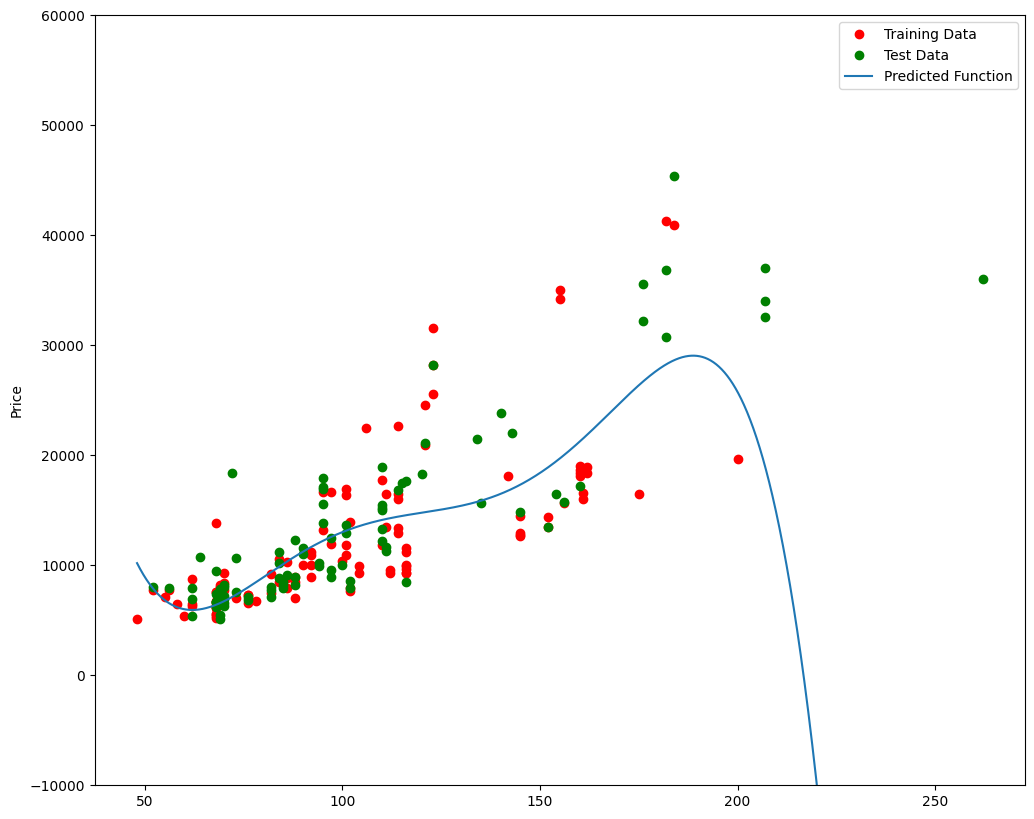

In [ ]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

##The lower the R^2, the worse the model.  A negative R^2 is a sign of overfitting.

In [ ]:
poly.score(x_train_pr, y_train)

0.5567716902120254

In [ ]:
poly.score(x_test_pr, y_test)

-29.871340302043684

Text(3, 0.75, 'Maximum R^2 ')

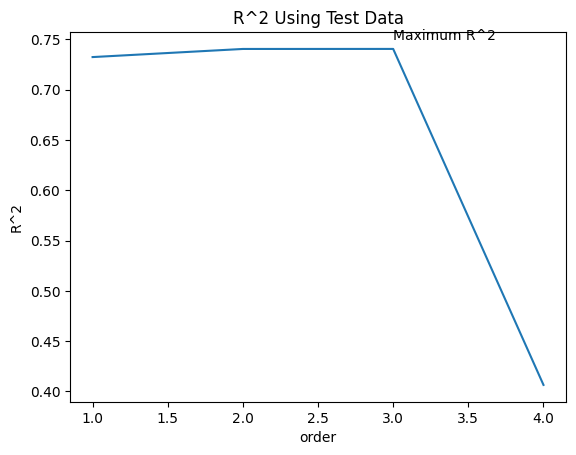

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [ ]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(x_train[['horsepower']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower']])
pr1

PolynomialFeatures()

In [ ]:
param1=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']
x_train_pr1 = pr1.fit_transform(x_train[param1])
x_test_pr1 = pr1.fit_transform(x_test[param1])


In [ ]:
x_train_pr1.shape

(110, 15)

In [ ]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

In [ ]:
yhat_train=poly1.predict(x_train_pr1)
yhat_test=poly1.predict(x_test_pr1)

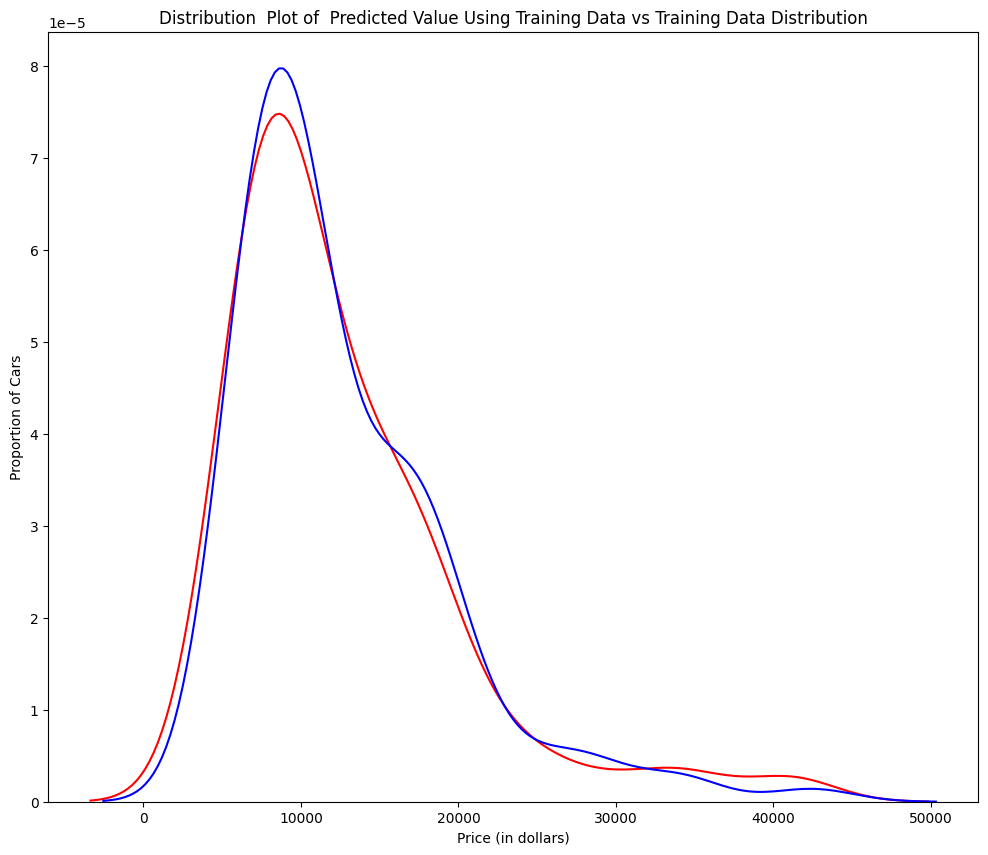

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

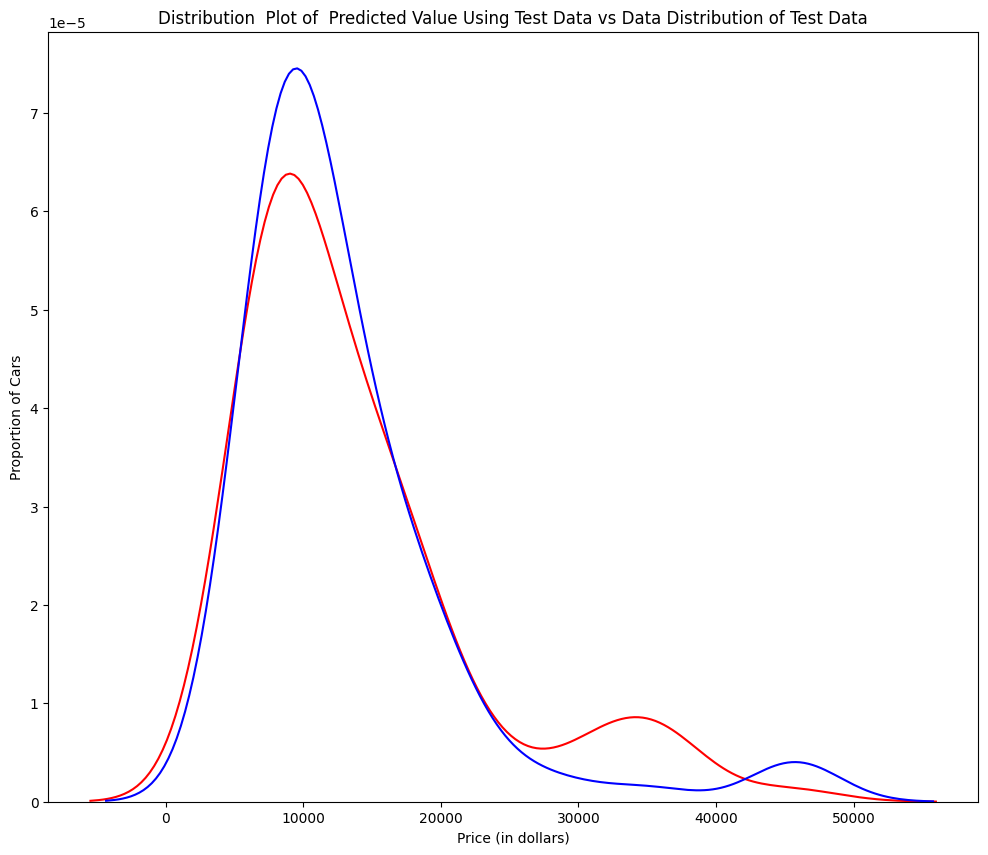

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
#The predicted value is higher than actual value for cars where the price $10,000 range,
#conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.



# Part 3: Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1

RigeModel=Ridge(alpha=1)

In [ ]:
RigeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17189e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1)

In [ ]:
yhat = RigeModel.predict(x_test_pr)

In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 7439.15485492  7826.49627157 11284.32208136 19953.96351143]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.406, Train Score=0.535]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17189e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.58, Train Score=0.535] /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.34378e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.631, Train Score=0.535]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.51567e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.654, Train Score=0.534]/usr/loc

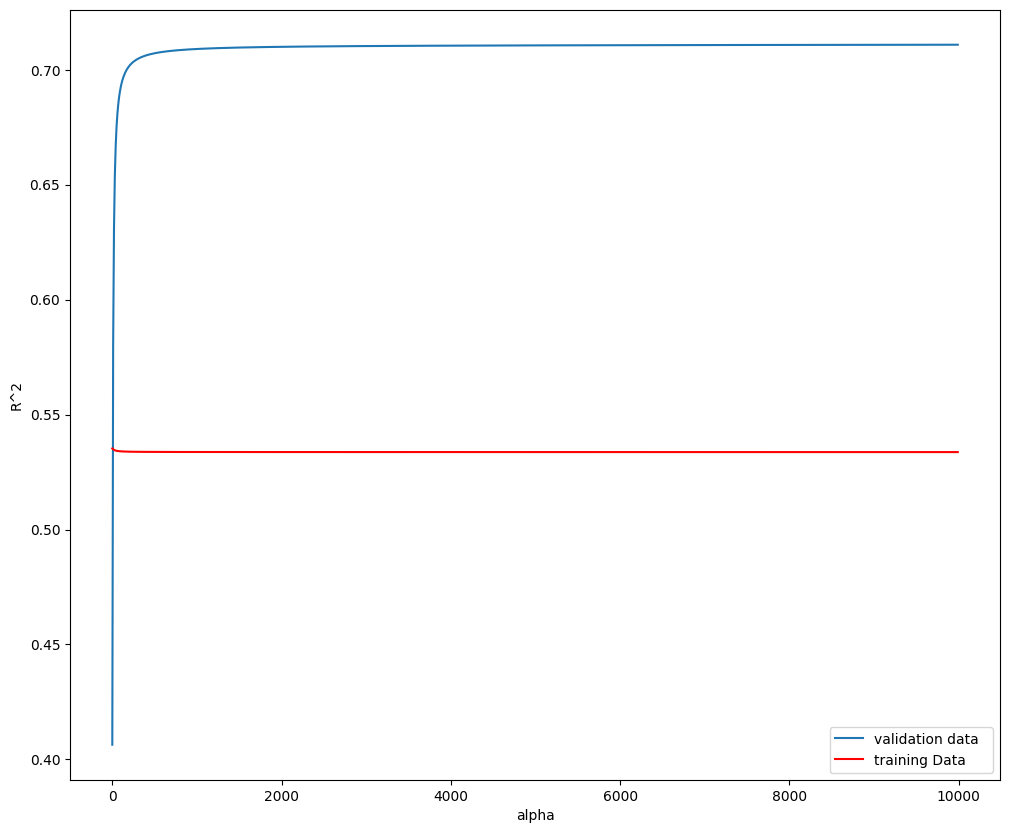

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17189e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.5802633843254112

# Part 4: Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [ ]:
#The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [ ]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)